In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# path to images
path = 'xray_dataset_covid19/'

# x-rays categories
categories = ['PNEUMONIA', 'NORMAL'] 

In [2]:
# initialize the data and labels
data = [] # append all images (resize)
labels = []  # append the category /label of image
imagePaths = []   # append the path of each image 
HEIGHT = 224
WIDTH = 224
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) 

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])


[['xray_dataset_covid19/PNEUMONIA/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S0140673620303706-fx1_lrg.jpg', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-001.jpg', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-002.jpg', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-002-a1.png', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-002-a2.png', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-003-b1.png', 0], ['xray_dataset_covid19/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-003-b2.png', 0], ['xray_dataset_covid19/PNEUMONIA/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', 0], ['xray_dataset_covid19/PNEUMONIA/171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg', 0]]
[['xray_dataset_covid19/NORMAL/IM-0010-0001.jpeg', 1], ['xray_dataset_covid19/PNEUMONIA/5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg', 0], ['xray_dataset_covid19/NORMAL/IM-0087-0001.jpe

In [3]:

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [4]:
data[0]

array([[[ 8,  8,  8],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [13, 13, 13]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [13, 13, 13],
        [10, 10, 10],
        [13, 13, 13]],

       ...,

       [[ 7,  7,  7],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [13, 13, 13]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [10, 10, 10],
        [12, 12, 12],
        [10, 10, 10]]], dtype=uint8)

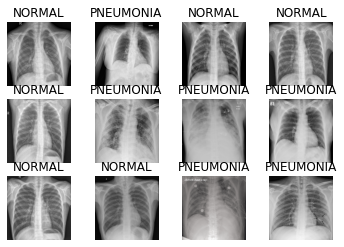

In [5]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0   # independent features
labels = np.array(labels)     # dependent features
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [6]:
data[0]
len(data)

148

In [7]:
len(labels)

148

In [8]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)


[1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0]
(118, 224, 224, 3)
(30, 224, 224, 3)
(118, 2)
(30,)


In [9]:
trainX[0]

array([[[0.16862745, 0.16862745, 0.16862745],
        [0.15294118, 0.15294118, 0.15294118],
        [0.14509804, 0.14509804, 0.14509804],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.11764706, 0.11764706, 0.11764706],
        [0.10980392, 0.10980392, 0.10980392]],

       [[0.16470588, 0.16470588, 0.16470588],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        [0.11764706, 0.11764706, 0.11764706]],

       [[0.16470588, 0.16470588, 0.16470588],
        [0.14509804, 0.14509804, 0.14509804],
        [0.14117647, 0.14117647, 0.14117647],
        ...,
        [0.12156863, 0.12156863, 0.12156863],
        [0.10196078, 0.10196078, 0.10196078],
        [0.1254902 , 0.1254902 , 0.1254902 ]],

       ...,

       [[0.10980392, 0.10980392, 0.10980392],
        [0.11764706, 0.11764706, 0.11764706],
        [0.10196078, 0

In [10]:
trainY

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

- https://keras.io/
- https://keras.io/guides/
- https://keras.io/examples/

In [22]:
model = Sequential()
# step 1 - convolutional layer
model.add(Convolution2D(32,(2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
# step 2 - pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# step 3 flattening
model.add(Flatten()) # to convert array of image  into 1D
# step 4 full connectio
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               50466944  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 50,467,618
Trainable params: 50,467,618
Non-trainable params: 0
__________________________________________

In [12]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
4/4 [==============================] - 3s 695ms/step - loss: 10.2689 - accuracy: 0.7373
Epoch 2/25
4/4 [==============================] - 3s 663ms/step - loss: 6.5832 - accuracy: 0.8051
Epoch 3/25
4/4 [==============================] - 3s 631ms/step - loss: 1.1308 - accuracy: 0.9068
Epoch 4/25
4/4 [==============================] - 3s 676ms/step - loss: 0.7621 - accuracy: 0.9237
Epoch 5/25
4/4 [==============================] - 3s 734ms/step - loss: 0.1673 - accuracy: 0.9746
Epoch 6/25
4/4 [==============================] - 3s 626ms/step - loss: 0.0395 - accuracy: 0.9915
Epoch 7/25
4/4 [==============================] - 3s 608ms/step - loss: 0.0228 - accuracy: 0.9915
Epoch 8/25
4/4 [==============================] - 3s 620ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 9/25
4/4 [==============================] - 3s 636ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 10/25
4/4 [==============================] - 3s 778ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 11/25
4/4 [=

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#pred = model.predict(testX)

1/1 [==============================] - 0s 367ms/step


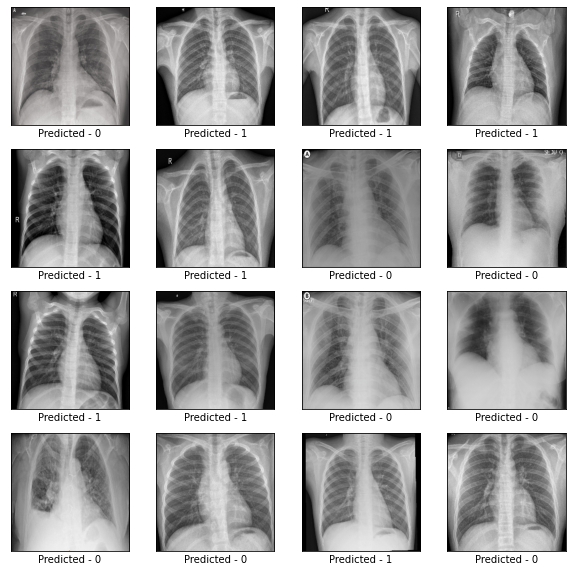

In [14]:
from numpy import argmax

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label#predictions = argmax(pred, axis=1)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(testX[i])
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    plt.xlabel(f'Predicted - {predictions[i]}')
plt.show()

In [15]:
predictions = argmax(pred, axis=1)
print(predictions)

[0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0]


In [16]:
print(testY)

[0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0]


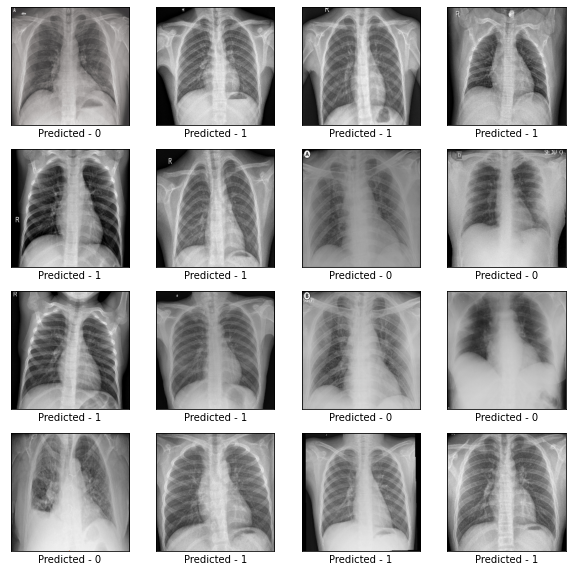

In [17]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(testX[i])
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    plt.xlabel(f'Predicted - {testY[i]}')
plt.show()

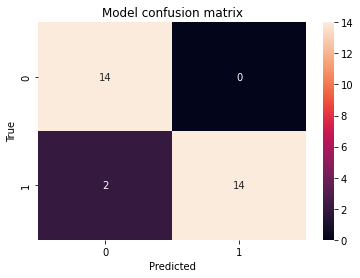

Accuracy : 93.33%


In [18]:
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

plt.title('Model confusion matrix')
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [19]:
cm

array([[14,  0],
       [ 2, 14]], dtype=int64)

In [20]:
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



- Individualy prediction

https://stackoverflow.com/questions/72383347/how-to-fix-it-attributeerror-module-keras-preprocessing-image-has-no-attribu

https://stackoverflow.com/questions/71820291/invalidargumenterror-graph-execution-error-with-cats-vs-dogs-program

In [21]:
from keras.utils import load_img, img_to_array 
import numpy as np
from keras.preprocessing import image
test_image = load_img('covid-19-pneumonia-7-PA.jpg', target_size = (224, 224))
test_image = img_to_array(test_image,dtype="float") / 255.0
test_image = np.expand_dims(test_image,axis=0)
from numpy import argmax
result = model.predict(test_image)
if result[0][0]==1:
    prediction= 'NORMAL'
    print(prediction)
else:
    prediction= 'PNEUMONIA'
    print(prediction)

1/1 [==============================] - 0s 56ms/step
PNEUMONIA


#### Om Kant Sharma